In [2]:
#!pip install poliastro
#!pip install astropy
import poliastro
from astropy.time import Time, TimeDelta
from astropy.coordinates import GCRS, CartesianRepresentation, EarthLocation
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from astropy import units as u

# Define the satellite's orbit
orbit = Orbit.from_classical(
    attractor=Earth,
    a=(6371+430) * u.km,  # Semi-major axis
    ecc=0.001 * u.one,  # Eccentricity
    inc=55 * u.deg,  # Inclination
    raan=0 * u.deg,  # RAAN
    argp=0 * u.deg,  # Argument of perigee
    nu=0 * u.deg,  # True anomaly
    epoch=Time("2025-01-23T0:00:00", scale="utc")  # Epoch
)

# Time span for propagation (use time differences)
start_time = orbit.epoch
print(orbit.state)
print(dir(orbit.state))

['L', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_a', '_argp', '_ecc', '_inc', '_nu', '_raan', 'a', 'arglat', 'argp', 'attractor', 'coe', 'e_vec', 'ecc', 'energy', 'f', 'g', 'h', 'h_vec', 'inc', 'k', 'n', 'nu', 'p', 'period', 'pqw', 'r', 'r_a', 'r_p', 'raan', 'rv', 'to_classical', 'to_equinoctial', 'to_vectors', 'v']


In [20]:
start_time = orbit.epoch+60*u.minute
end_time = start_time + 93 * u.minute
import numpy as np
time_steps = [start_time + i * u.minute for i in np.arange(0, 93, 1./85)]

# Propagate and extract coordinates
latitudes = []
longitudes = []

for t in time_steps:
    # Calculate time of flight as a duration
    time_of_flight = t - orbit.epoch  # This is now a TimeDelta (duration)

    # Propagate the orbit
    propagated_orbit = orbit.propagate(time_of_flight)

    # Get satellite position in ECI
    r = propagated_orbit.rv()[0]

    # Convert ECI to GCRS frame
    position = CartesianRepresentation(r)
    gcrs = GCRS(position, obstime=t)

    # Convert GCRS to EarthLocation (lat, lon, alt)
    loc = EarthLocation.from_geocentric(*gcrs.cartesian.xyz, unit=u.m)
    latitudes.append(loc.lat.deg)
    longitudes.append(loc.lon.deg)

# Output latitudes and longitudes
x,y=[],[]
for lat, lon in zip(latitudes, longitudes):
    x.append(lat)
    y.append(lon)


In [4]:
print(time_steps)
print(x[0],y[0])
print(x[1],y[1])
# calculate the distance between two points
from geopy.distance import geodesic
coords_1 = (x[0], y[0])
coords_2 = (x[1], y[1])
print(geodesic(coords_1, coords_2))


[<Time object: scale='utc' format='isot' value=2025-01-23T01:00:00.000>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:00.706>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:01.412>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:02.118>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:02.824>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:03.529>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:04.235>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:04.941>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:05.647>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:06.353>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:07.059>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:07.765>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:08.471>, <Time object: scale='utc' format='isot' value=2025-01-23T01:00:

In [15]:
def get_triangle_vars(a,b,B):
    c = a*np.cos(B)-np.sqrt(b**2-a**2*np.sin(B)**2)
    A = np.arccos((b**2 + c**2 - a**2)/(2*b*c))
    C = np.arccos((a**2 + b**2 - c**2)/(2*a*b))
    return A, B, C, a, b, c

r_earth=6371
h_sat=400
import numpy as np
view_angle=17
r_h=r_earth+h_sat


def lon_lat_to_xyz(r_earth,lon,lat):
    x=r_earth*np.cos(lat)*np.cos(lon)
    y=r_earth*np.cos(lat)*np.sin(lon)
    z=r_earth*np.sin(lat)
    return x,y,z

def cross_product(v1,v2):
    x1,y1,z1=v1
    x2,y2,z2=v2
    x = y1*z2 - y2*z1
    y = z1*x2 - z2*x1
    z = x1*y2 - x2*y1
    return x,y,z
localZenithAngle=[18.189877,   17.43291,    16.671007,   15.9137535,  15.158456,   14.405092,\
    13.648316,   12.8897085,  12.130318,   11.377583,   10.617645,    9.862196,\
    9.108555,    8.352984,    7.597067,    6.8434463,   6.089454,    5.335081,\
    4.5808573,   3.8257294,   3.0702605,   2.3193207,   1.5647225,   0.8158924,\
    0.11826304]
for angle in localZenithAngle[::-1][:-1]:
    localZenithAngle.append(-angle)
print(len(localZenithAngle))
print(localZenithAngle)

49
[18.189877, 17.43291, 16.671007, 15.9137535, 15.158456, 14.405092, 13.648316, 12.8897085, 12.130318, 11.377583, 10.617645, 9.862196, 9.108555, 8.352984, 7.597067, 6.8434463, 6.089454, 5.335081, 4.5808573, 3.8257294, 3.0702605, 2.3193207, 1.5647225, 0.8158924, 0.11826304, -0.11826304, -0.8158924, -1.5647225, -2.3193207, -3.0702605, -3.8257294, -4.5808573, -5.335081, -6.089454, -6.8434463, -7.597067, -8.352984, -9.108555, -9.862196, -10.617645, -11.377583, -12.130318, -12.8897085, -13.648316, -14.405092, -15.158456, -15.9137535, -16.671007, -17.43291]


In [6]:
import datetime
ref_date=datetime.datetime(1970,1,1,0,0)
#print(dir(time_steps[0]))
print(time_steps[0].to_datetime()-ref_date)
dt=time_steps[0].to_datetime()-ref_date
print(dt.total_seconds())
print(time_steps[1])
#vars time, sat_altitude, sat_longitude, sat_latitude, latitude, longitude


20111 days, 1:00:00
1737594000.0
2025-01-23T01:00:00.706


In [7]:
timeL=[]
sat_altitudeL=[]
h_sat=430
lonL=[]
latL=[]
for i,t in enumerate(time_steps):
    dt=t.to_datetime()-ref_date
    timeL.append(dt.total_seconds())
    sat_altitudeL.append(h_sat)
    lonL.append(y[i])
    latL.append(x[i])

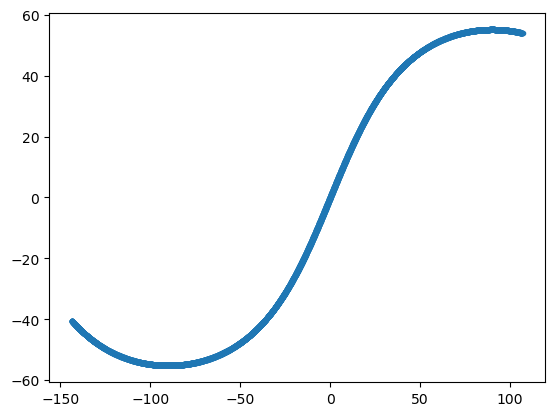

In [9]:
import matplotlib.pyplot as plt
plt.plot(lonL[:5000],latL[:5000],'.')

In [16]:

lon_dpr=[]
lat_dpr=[]
localZenithAngleL=[]
for i in range(len(x)-1):
    lon1=y[i]
    lat1=x[i]
    lon2=y[i+1]
    lat2=x[i+1]
    localZenithAngleL.append(localZenithAngle)
    lon_scan=[]
    lat_scan=[]
    for view_angle in localZenithAngle:
        B=view_angle/180*np.pi
    #A,B,C,a,b,c=get_triangle_vars(r_h,r_earth,B)
        A,B,C,a_sat,b_earth,c_slant=get_triangle_vars(r_h,r_earth,B)
        x1,y1,z1=lon_lat_to_xyz(r_h,np.radians(lon1),np.radians(lat1))
        x2,y2,z2=lon_lat_to_xyz(r_earth,np.radians(lon2),np.radians(lat2))
        v1=(x1,y1,z1)
        v2=(x2-x1,y2-y1,z2-z1)
        v3=cross_product(v1,v2)
        c_proj=c_slant*np.cos(B)
        f_scale=(r_h-c_proj)/r_h
        x1_scaled,y1_scaled,z1_scaled=x1*f_scale,y1*f_scale,z1*f_scale
        v_3_norm=np.sqrt(v3[0]**2+v3[1]**2+v3[2]**2)
        dv=c_slant*np.sin(B)/v_3_norm*np.array(v3)
        x_proj,y_proj,z_proj=x1_scaled+dv[0],y1_scaled+dv[1],z1_scaled+dv[2]
        d_to_proj=np.sqrt(x_proj**2+y_proj**2+z_proj**2)
    # transform to lat lon
        lon_proj=np.arctan2(y_proj,x_proj)
        lat_proj=np.arcsin(z_proj/d_to_proj)
        lon_scan.append(lon_proj)
        lat_scan.append(lat_proj)
    lon_dpr.append(lon_scan)
    lat_dpr.append(lat_scan)

In [21]:
lon_dpr=np.array(lon_dpr).astype(np.float32)
lat_dpr=np.array(lat_dpr).astype(np.float32)
lon_dpr=np.array(lon_dpr).astype(np.float32)
lat_dpr=np.array(lat_dpr).astype(np.float32)
sat_altitudeL=np.array(sat_altitudeL).astype(np.float32)
timeL=np.array(timeL).astype(np.float64)
lonL=np.array(lonL).astype(np.float32)
latL=np.array(latL).astype(np.float32)
localZenithAngleL=np.array(localZenithAngleL).astype(np.float32)
print(lon_dpr.shape)
print(lat_dpr.shape)

(7904, 49)
(7904, 49)


In [22]:
print(len(localZenithAngle))
import xarray as xr
timeX=xr.DataArray(timeL[:-1],dims='atrack')
# add units
timeX.attrs['units']='seconds since 1970-01-01 00:00:00'
timeX.attrs['long_name']='Time'
sat_altitudeX=xr.DataArray((sat_altitudeL[:-1]),dims='atrack')
sat_altitudeX.attrs['units']='km'
sat_altitudeX.attrs['long_name']='Satellite altitude'
lonX=xr.DataArray(lonL[:-1],dims='atrack')
lonX.attrs['units']='degrees'
lonX.attrs['long_name']='Longitude'
latX=xr.DataArray(latL[:-1],dims='atrack')
latX.attrs['units']='degrees'
latX.attrs['long_name']='Latitude'
lon_dprX=xr.DataArray(lon_dpr,dims=['atrack','xtrack'])
lon_dprX.attrs['units']='degrees'
lon_dprX.attrs['long_name']='FOV Longitude'
lat_dprX=xr.DataArray(lat_dpr,dims=['atrack','xtrack'])
lat_dprX.attrs['units']='degrees'
lat_dprX.attrs['long_name']='FOV Latitude'
localZenithAngleX=xr.DataArray(localZenithAngleL,dims=['atrack','xtrack'])
localZenithAngleX.attrs['units']='degrees'
localZenithAngleX.attrs['long_name']='Local Zenith Angle'
print(lon_dprX.shape)
print(lat_dprX.shape)
print(lonX.shape)
print(latX.shape)
ds=xr.Dataset({'time':timeX,'sat_altitude':sat_altitudeX,'sat_lon':lonX,'sat_lat':latX,'Longitude':lon_dprX,'Latitude':lat_dprX,'LocalZenithAngle':localZenithAngleX})
compLev=5
encoding = {var: {'complevel': compLev} for var in ds.data_vars}
ds.to_netcdf('kupr_geoloc.nc',encoding=encoding)
#ds.to_netcdf('kupr_geoloc.nc')

49
(7904, 49)
(7904, 49)
(7904,)
(7904,)
